In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

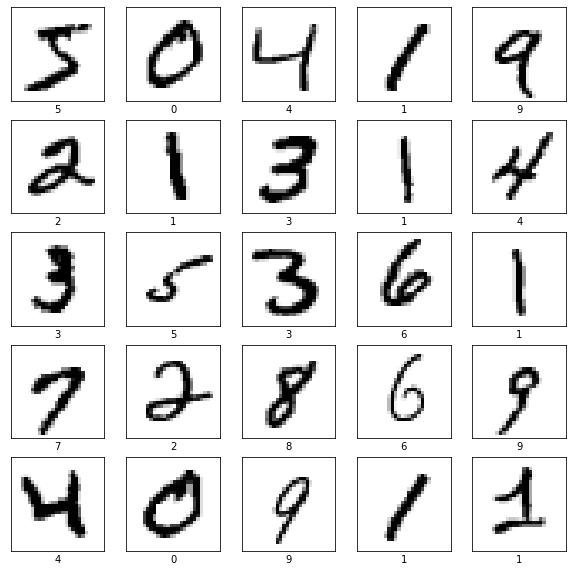

In [17]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [18]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [45]:
EPOCHS = 10
OPTIMIZER = 'adam'
REGULARIZER = 0.001

In [46]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(input_shape=(28, 28, 1), 
                              kernel_size=(5, 5), filters=6, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(kernel_size=(5, 5), filters=16, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())    #256
model.add(keras.layers.Dense(120, activation='relu', 
                             kernel_regularizer=keras.regularizers.l2(REGULARIZER)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(84, activation='relu', 
                             kernel_regularizer=keras.regularizers.l2(REGULARIZER)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=OPTIMIZER,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [47]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=64, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 217us/sample - loss: 0.6163 - accuracy: 0.8593 - val_loss: 0.2286 - val_accuracy: 0.9743
Epoch 2/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.2748 - accuracy: 0.9591 - val_loss: 0.1589 - val_accuracy: 0.9844
Epoch 3/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.2156 - accuracy: 0.9683 - val_loss: 0.1369 - val_accuracy: 0.9832
Epoch 4/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.1821 - accuracy: 0.9718 - val_loss: 0.1145 - val_accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.1656 - accuracy: 0.9740 - val_loss: 0.1100 - val_accuracy: 0.9864
Epoch 6/10
60000/60000 [==============================] - 16s 264us/sample - loss: 0.1503 - accuracy: 0.9771 - val_loss: 0.0989 - val_accuracy: 0.9882
Epoch 7/10
60000/60000 [====================

In [22]:
# with dropout without regularization optimizer=adam
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()REGULARIZER

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.078896,0.978900,0.035559,0.9883,5
6,0.069165,0.981600,0.033762,0.9890,6
7,0.062709,0.983550,0.036886,0.9889,7
8,0.059277,0.983633,0.031036,0.9905,8
9,0.056507,0.984450,0.031460,0.9907,9


In [27]:
# without dropout without regularization optimizer=adam
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.030991,0.989717,0.034515,0.9876,5
6,0.023293,0.992500,0.033996,0.9884,6
7,0.022319,0.992950,0.040202,0.9881,7
8,0.017073,0.994383,0.036677,0.9886,8
9,0.016972,0.994067,0.033621,0.9891,9


In [48]:
# with dropout with regularization optimizer=adam
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.150279,0.977133,0.098891,0.9882,5
6,0.142492,0.977733,0.092731,0.9893,6
7,0.135350,0.978950,0.093610,0.9890,7
8,0.130993,0.979583,0.090750,0.9894,8
9,0.128365,0.980783,0.088401,0.9895,9


In [44]:
# with dropout without regularization optimizer=rmsprop
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.091974,0.976983,0.049306,0.9875,5
6,0.094970,0.977267,0.057732,0.9872,6
7,0.096452,0.976967,0.056151,0.9852,7
8,0.096868,0.976717,0.092623,0.9795,8
9,0.100114,0.975767,0.054497,0.9879,9


In [39]:
# with dropout without regularization optimizer=sgd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,0.256989,0.927217,0.100617,0.9702,5
6,0.229512,0.934300,0.081972,0.9739,6
7,0.211395,0.939983,0.085914,0.9733,7
8,0.198839,0.944833,0.081443,0.9765,8
9,0.183884,0.949017,0.096230,0.9701,9


In [23]:
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']

    # make a figure
    fig = plt.figure(figsize=(8,4))
    
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

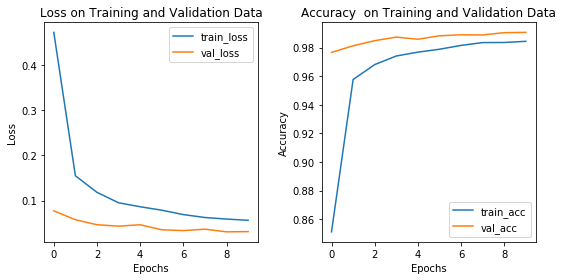

In [24]:
#with dropout optimizer=adam
training_vis(history)